In [55]:
%matplotlib inline
# %matplotlib notebook

import os
import sys
import time
import pickle
import numpy as np
import csv
import pandas as pd
from scipy import ndimage
from skimage import measure
from skimage import feature
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

import util
import image_aug
import luna_preprocess
import kagl_preprocess
import kagl_test_unet5
import kagl_feature_util
import kagl_feature_set1

reload(util);
reload(image_aug);
reload(luna_preprocess);
reload(kagl_preprocess);
reload(kagl_test_unet5);
reload(kagl_feature_util);
reload(kagl_feature_set1);

In [51]:
def plot_image_and_mask(image, mask):
    plt.imshow(image, cmap='gray')
    plt.imshow(mask, cmap='jet', alpha=0.5)

    
def plot_nodule(patient, nodule_idx, new_size=48):
    p = patient
    nodule = p._nodule_regions[nodule_idx]
    print 'area =', nodule.area
    print 'shape = ', nodule.filled_image.shape
    t_image = p.nodule_local_image(nodule_idx, [new_size]*3)
    t_mask = p.nodule_local_mask(nodule_idx, [new_size]*3)
    z = new_size//2
    plt.figure()
    plt.imshow(t_image[z], cmap='gray')
    plt.show()
    plt.figure()
    plot_image_and_mask(t_image[z], t_mask[z])
    plt.show()

In [52]:
stage = 'stage1'
meta_patient = kagl_preprocess.MetaPatient(stage)

In [53]:
pos_names, neg_names = [], []
for name, label in meta_patient.labels.iteritems():
    if label is None:
        pass
    elif label >= 0.5:
        pos_names.append(name)
    else:
        neg_names.append(name)
pos_names, neg_names = sorted(pos_names), sorted(neg_names)
print '#pos =', len(pos_names)
print '#neg =', len(neg_names)

#pos = 362
#neg = 1035


In [39]:
names = pos_names
name_idx = np.random.randint(len(names))
name = names[name_idx]
label = meta_patient.labels[name]

p = kagl_feature_util.Patient(stage, name)
print 'pos' if label>=0.5 else 'neg'
print name
image = p._image
masked_lung = p._masked_lung
print masked_lung.shape
nodule_mask = p._nodule_mask

pos
b83ce5267f3fd41c7029b4e56724cd08
(245, 208, 279)


In [56]:
kagl_feature_set1.extract_nodule_features(p, 1)

[10,
 -0.79395838891565873,
 0.70180306752761734,
 0.014765438627052692,
 -348.33333333333331,
 323.83749353992698,
 -0.0026419503348214285,
 10.0,
 0.6831300510639734,
 3.5682482323055424,
 4.0987803063838397,
 2.9933259094191524,
 0.0,
 8.8284271247461898,
 1.0]

In [63]:
areas = [
    r.area
    for r in p._nodule_regions
]
sorted_areas = sorted(zip(areas, range(len(areas))), reverse=True)
print sorted_areas[0:5]

[(2475, 1), (131, 7), (96, 70), (80, 37), (51, 10)]


1 , 1 ============================================================
6.16901512978e-05
area = 2475
shape =  (22, 23, 24)


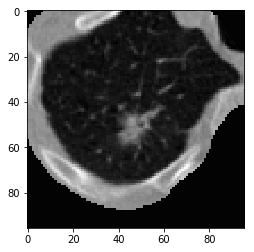

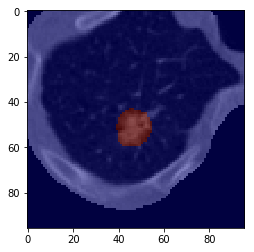

2 , 7 ============================================================
-0.000555577168938
area = 131
shape =  (3, 9, 8)


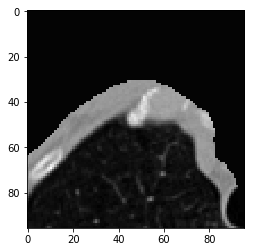

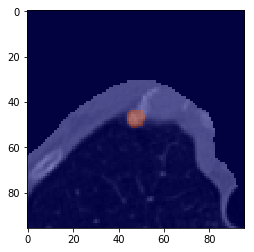

3 , 70 ============================================================
-0.00089261553974
area = 96
shape =  (1, 11, 11)


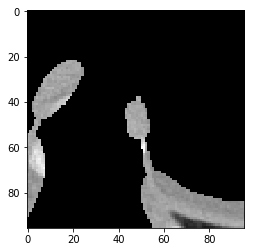

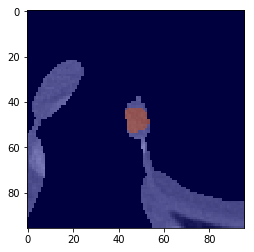

4 , 37 ============================================================
-0.00146290612599
area = 80
shape =  (4, 11, 10)


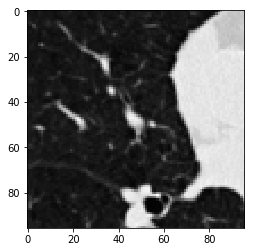

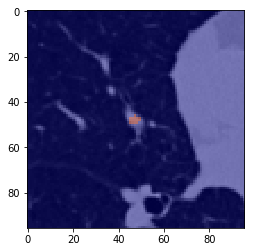

5 , 10 ============================================================
-4.36347827577e-05
area = 51
shape =  (4, 5, 5)


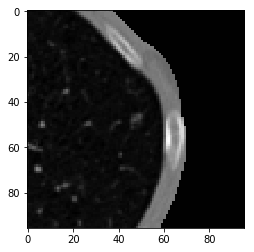

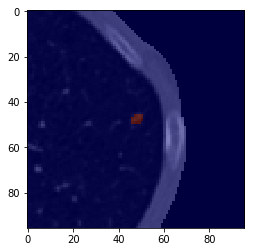

6 , 45 ============================================================
-9.35526727473e-05
area = 42
shape =  (3, 5, 5)


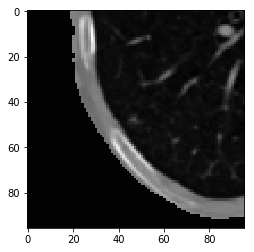

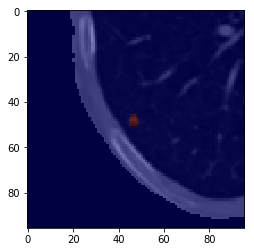

7 , 50 ============================================================
-4.49978575415e-05
area = 40
shape =  (5, 5, 5)


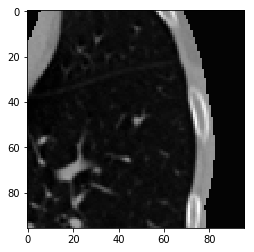

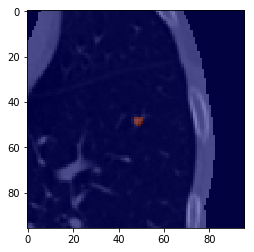

8 , 72 ============================================================
-0.000879702360734
area = 38
shape =  (3, 6, 7)


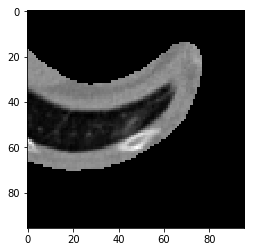

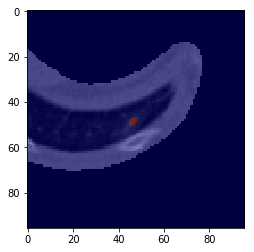

9 , 39 ============================================================
-0.00210466457687
area = 36
shape =  (1, 7, 6)


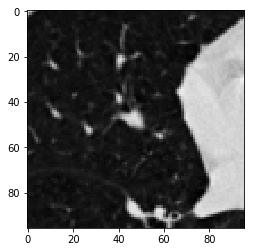

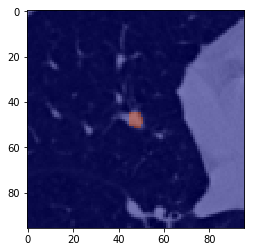

10 , 28 ============================================================
0.000125761955015
area = 36
shape =  (3, 5, 4)


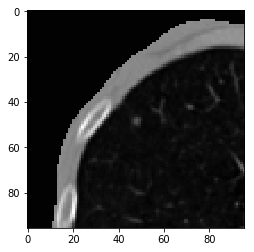

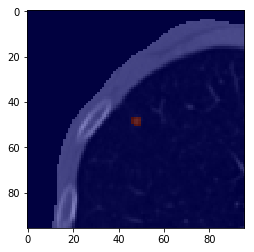

In [73]:
count = 0
for _, nodule_idx in sorted_areas[0:10]:
    count += 1
    print count, ',', nodule_idx, '=' * 60
    print nodule_boundary_diff(p, nodule_idx)
    plot_nodule(p, nodule_idx, 96)

In [129]:
timage = p.nodule_local_image(67, [64]*3)[32]
tmask = p.nodule_local_mask(67, [64]*3)[32]

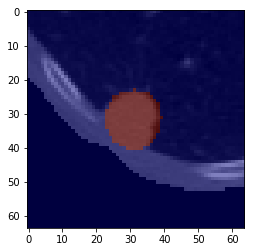

In [180]:
plot_image_and_mask(timage, tmask)

In [195]:
x = ndimage.gaussian_filter(timage, 0.1)
tedges = feature.canny(x, sigma=0.1)
print np.sum(tedges)

39


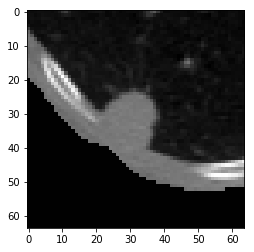

In [198]:
plt.imshow(x, cmap='gray')

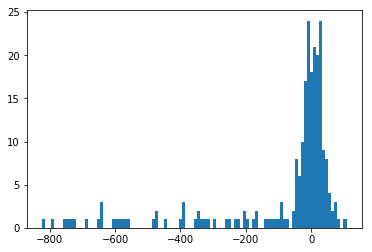

In [156]:
plt.hist(timage[tmask], bins=100);

In [158]:
np.median(timage[tmask])

-6.5

In [ ]:
plt.plot(timage)

In [172]:
x = measure.find_contours(timage, -7)

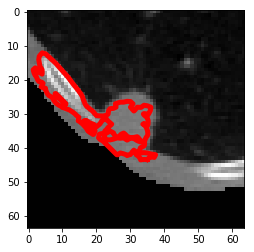

In [173]:
plt.imshow(timage, cmap='gray')
idx = 0
plt.plot(x[idx][:,1], x[idx][:,0], color='r', linewidth=5)

In [ ]:
ans = kagl_feature_set1.extract_patient_features('stage1', 'e129305f6d074d08cd2de0ebdfeaa576')

In [ ]:
p = kagl_feature_util.Patient('stage1', 'e129305f6d074d08cd2de0ebdfeaa576')

In [ ]:
nod_idx=np.argmax([r.area for r in p._nodule_regions])
print nod_idx
r = p._nodule_regions[nod_idx]
local_image = p.nodule_local_image(nod_idx)
local_mask = p.nodule_local_mask(nod_idx)
local_masked_image = util.apply_mask(local_image, local_mask)

In [ ]:
z = local_image.shape[0]//2
print z
plot_image_and_mask(local_image[z], local_mask[z])

In [ ]:
file_list = luna_preprocess.get_file_list()
file_dict = luna_preprocess.get_file_dict(file_list)
annt_df = luna_preprocess.get_annt_df(file_dict)

In [ ]:
annt_df.diameter_mm.describe()

In [ ]:
stage = 'stage1'
meta_patient = kagl_preprocess.MetaPatient(stage)

In [ ]:
feature_set = np.load('kagl_output_feature_set1.npy').item()

In [ ]:
train_names = []
test_names = []
for name, label in meta_patient.labels.iteritems():
    if label is not None:
        train_names.append(name)
    else:
        test_names.append(name)

In [ ]:
def prepare_data(names, meta_patient, feature_set):
    feature_np = []
    label_np = []
    for name in names:
        label_np.append(meta_patient.labels[name])
        feature_np.append(feature_set[name])
    feature_np = np.asarray(feature_np, dtype=np.float)
    label_np = np.asarray(label_np, dtype=np.float)
    
    try:
        print 'feature.shape = ', feature_np.shape
        print 'pos = %d, %f'%(
            np.sum(label_np),
            np.sum(label_np) * 1.0 / len(label_np))
        print 'neg = %d, %f'%(
            len(label_np) - np.sum(label_np),
            1.0 - np.sum(label_np) * 1.0 / len(label_np))
    except:
        pass
    
    return feature_np, label_np

In [ ]:
train_feature_np, train_label_np = prepare_data(
    train_names, meta_patient, feature_set)

test_feature_np, _ = prepare_data(
    test_names, meta_patient, feature_set)

In [ ]:
import xgboost as xgb

from sklearn.cross_validation import StratifiedKFold as KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import Normalizer

In [ ]:
X_map = np.load('feature_map_thres_5.dat').item()

X = np.array([X_map[p] for p in train_names])
Y = np.array([meta_patient.labels[p] for p in train_names]).astype('float32')

X = X.clip(min=1e-5)

In [ ]:
X = train_feature_np
Y = train_label_np

In [ ]:
#normalizer = Normalizer(copy=False)
#X_scaled = normalizer.fit_transform(X)
X_scaled = X

In [ ]:
# All Cancer
print("Predicting all positive")
y_pred = np.ones(Y.shape)
print(classification_report(
      Y, y_pred, target_names=["No Cancer", "Cancer"]))
print("logloss", kagl_feature_util.logloss(Y, y_pred))

# No Cancer
print("Predicting all negative")
y_pred = Y * 0
print(classification_report(Y, y_pred, target_names=["No Cancer", "Cancer"]))
print("logloss", kagl_feature_util.logloss(Y, y_pred))

In [ ]:
skf = StratifiedKFold(n_splits=10)
kf = skf.split(X, Y)

y_pred_rf = Y * 0.0
y_pred_svc = Y * 0.0
y_pred_xgb = Y * 0.0
for train, valid in kf:
    X_train, X_valid, y_train, y_valid = (
        X_scaled[train, :], X_scaled[valid, :], Y[train], Y[valid])
    clf_rf = RF(n_estimators=100, n_jobs=3)
    clf_rf.fit(X_train, y_train)
    y_pred_tmp = clf_rf.predict_proba(X_valid)[:,1]
    y_pred_rf[valid] = y_pred_tmp
    
    clf_svc = SVC(
        class_weight={0: 2},
        probability=True,
        shrinking=True,
        C=0.01,
        gamma=1000)
    clf_svc.fit(X_train, y_train)
    y_pred_tmp = clf_svc.predict_proba(X_valid)[:,1]
    y_pred_svc[valid] = y_pred_tmp

    clf_xgb = xgb.XGBClassifier(
        max_depth=10,
        learning_rate=0.01,
        n_estimators=100,
        objective="binary:logistic")
    clf_xgb.fit(X_train, y_train)
    y_pred_tmp = clf_xgb.predict_proba(X_valid)[:,1]
    y_pred_xgb[valid] = y_pred_tmp
    
print 'Random forest'
print(classification_report(
        Y, y_pred_rf > 0.5, target_names=["No Cancer", "Cancer"]))
print("logloss", kagl_feature_util.logloss(Y, y_pred_rf))

print 'SVM'
print(classification_report(
        Y, y_pred_svc > 0.5, target_names=["No Cancer", "Cancer"]))
print("logloss", logloss(Y, y_pred_svc))

print 'XGB'
print(classification_report(
        Y, y_pred_xgb > 0.5, target_names=["No Cancer", "Cancer"]))
print("logloss", logloss(Y, y_pred_xgb))

In [ ]:
X_test = test_feature_np
# X_test = normalizer.transform(X_test)

In [ ]:
y_test = clf_rf.predict_proba(X_test)

In [ ]:
kagl_feature_util.write_submission_file(test_names, y_test, 'rf')